In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sqlalchemy import create_engine
from pandas.io import sql

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
engine = create_engine('sqlite:///:memory:')
df.to_sql('vgsales',engine)

16598

In [5]:
nim = 17
awal = nim*10
akhir = awal+200

buatlah query (Name,Platform,Year,Genre,Publisher,Global_Sales) dengan limit nim(3digit nim kalian)*10 sampai nim*10+200

In [21]:
res = pd.read_sql_query(
    "SELECT Name,Platform,Year,Genre,Publisher,Global_Sales "+
    "FROM vgsales WHERE Genre in('Role-Playing','Action') AND Platform in('PS2','PS3','PS4')"+
    " ORDER BY Rank ASC LIMIT ?,?",engine,params=[(awal,akhir)])

In [16]:
res.shape

(370, 6)

In [22]:
print(res)

                                                  Name Platform    Year  \
0                                            Bayonetta      PS3  2009.0   
1                       LEGO Batman 2: DC Super Heroes      PS3  2012.0   
2    The Lord of the Rings: The Fellowship of the Ring      PS2  2002.0   
3                   LEGO Star Wars III: The Clone Wars      PS3  2011.0   
4                           One Piece: Pirate Warriors      PS3  2012.0   
..                                                 ...      ...     ...   
365                           Disney's Treasure Planet      PS2  2002.0   
366                           Deus Ex: Mankind Divided      PS4  2016.0   
367                          Scooby-Doo! First Frights      PS2  2009.0   
368                               Way of the Samurai 2      PS2  2003.0   
369                         Disgaea 2: Cursed Memories      PS2  2006.0   

            Genre                               Publisher  Global_Sales  
0          Action        

In [11]:
res=df.iloc[170:370]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
171,172,Pokemon Pinball,GB,1999.0,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
172,173,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.30
173,174,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.30
174,175,Final Fantasy X-2,PS2,2003.0,Role-Playing,Electronic Arts,1.92,1.08,2.11,0.17,5.29
...,...,...,...,...,...,...,...,...,...,...,...
365,366,Battlefield 4,X360,2013.0,Shooter,Electronic Arts,2.14,1.08,0.02,0.29,3.53
366,367,FIFA Soccer 11,X360,2010.0,Sports,Electronic Arts,0.71,2.40,0.02,0.40,3.53
367,368,Rugrats in Paris: The Movie,PS,2000.0,Action,THQ,1.96,1.33,0.00,0.23,3.52
368,369,Spyro 2: Ripto's Rage!,PS,1999.0,Platform,Sony Computer Entertainment,2.14,1.21,0.01,0.17,3.52


In [28]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

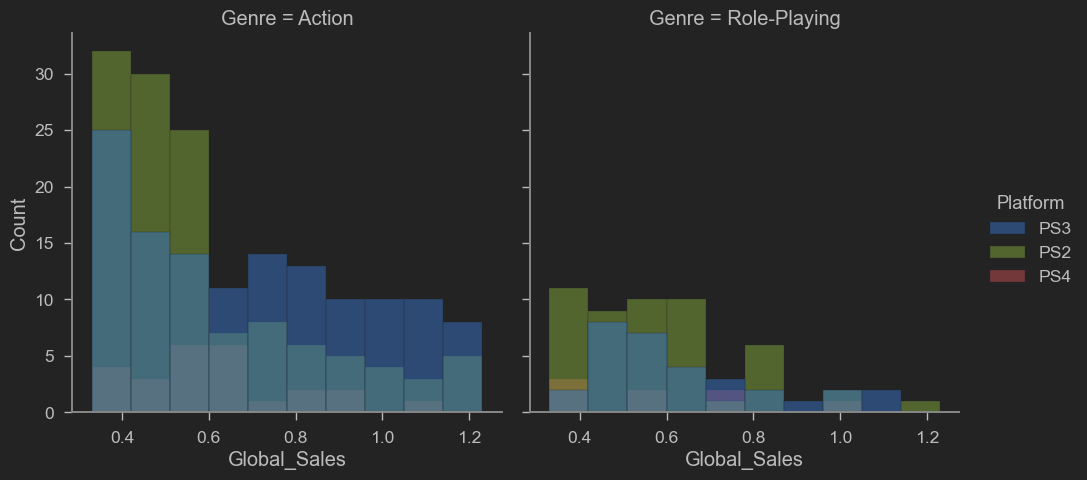

In [29]:
sns.displot(data=res, x="Global_Sales", col="Genre",hue="Platform")

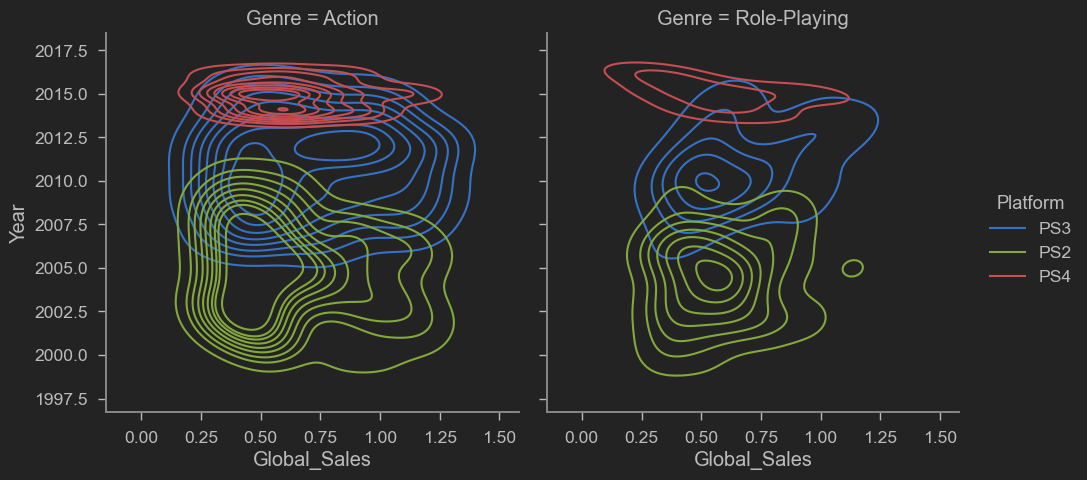

In [30]:
sns.displot(data=res, x="Global_Sales", y="Year", col="Genre",hue="Platform", kind="kde")